<a href="https://colab.research.google.com/github/potat0w/Aaagh-more-math/blob/main/Module_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
california=fetch_california_housing(as_frame=True)
df=california.frame.copy()
print(df.shape)
df.head(10)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [ ]:
target_col='MedHouseVal'

feature_cols=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

X=df[feature_cols]
y=df[target_col]

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [ ]:
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (20640, 6)
Shape of y:  (20640,)


In [ ]:
corr_matrix=df[feature_cols+[target_col]].corr()
print("Corelation matrix: ")
corr_matrix

Corelation matrix: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


Correlation matrix: 
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


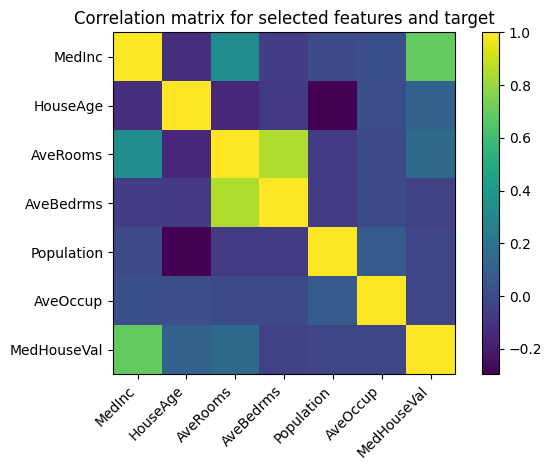

In [ ]:
orr_matrix = df[feature_cols + [target_col]].corr()
print("Correlation matrix: ")
print(corr_matrix)


# Plot correlation matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation matrix for selected features and target')
plt.tight_layout()
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42
)

print("Training set size: ",X_train.shape[0],"Rows")
print("Testing set size: ",X_test.shape[0],"Rows")

Training set size:  16512 Rows
Testing set size:  4128 Rows


In [ ]:
lin_reg=LinearRegression()

lin_reg.fit(X_train,y_train)

print("Model trained successfully")

Model trained successfully


In [ ]:
print("Intercept(Bias term: )",lin_reg.intercept_)
print("\nCoefficients: ")

for feature_name,coef in zip(feature_cols,lin_reg.coef_):
    print(f"{feature_name}: {coef}")

Intercept(Bias term: ) -0.5528727644615126

Coefficients:  [ 5.46160779e-01  1.67879091e-02 -2.23919944e-01  1.11549261e+00
  2.31671974e-05 -4.61823135e-03]
MedInc: 0.5461607791074247
HouseAge: 0.016787909062568093
AveRooms: -0.2239199440047988
AveBedrms: 1.1154926114808392
Population: 2.3167197368202663e-05
AveOccup: -0.004618231345406933


In [ ]:
y_train_pred=lin_reg.predict(X_train)
y_test_pred=lin_reg.predict(X_test)

print("Some sample predictions on test set : ")
print("Predicted: ",y_test_pred[:5])
print("Actual: ",y_test[:5])

Some sample predictions on test set : 
Predicted:  [1.00100537 1.56005635 2.67713262 2.64763331 1.98229968]
Actual:  20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64


In [ ]:
def regression_matrix(y_true,y_pred,label='Model'):
  mae=mean_absolute_error(y_true,y_pred)
  mse=mean_squared_error(y_true,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_true,y_pred)

  print(f"{label} MAE: {mae:.2f}")
  print(f"{label} MSE: {mse:.2f}")
  print(f"{label} RMSE: {rmse:.2f}")

regression_matrix(y_train,y_train_pred,"Linear regression Training")
regression_matrix(y_test,y_test_pred,"Linear regression Testing")

Linear regression Training MAE: 0.57
Linear regression Training MSE: 0.61
Linear regression Training RMSE: 0.78
Linear regression Testing MAE: 0.58
Linear regression Testing MSE: 0.64
Linear regression Testing RMSE: 0.80


In [ ]:
degrees=[1,3,5,2]
results=[]

for deg in degrees:
  model=Pipeline([
      ('poly',PolynomialFeatures(degree=deg,include_bias=False)),
      ('lin_reg',LinearRegression())
  ])
  model.fit(X_single_train,y_single_train)
  y_train_pred_deg=model.predict(X_train)
  y_test_pred_deg=model.predict(X_test)
  mae_train=mean_absolute_error(y_train,y_train_pred_deg)
  rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred_deg))
  mae_test=mean_absolute_error(y_test,y_test_pred_deg)
  r2_train=r2_score(y_train,y_train_pred_deg)
  r2_test=r2_score(y_test,y_test_pred_deg)
  results.append({
      'degree':deg,
      'mae_train':mae_train,
      'rmse_train':rmse_train,
      'mae_test':mae_test,
  })